In [20]:
import os
from PIL import Image
from utils import *
import torch
from diffusers import StableDiffusionPipeline

device = "cuda:0"

### Load Stable Diffusion

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    torch_dtype=torch.float16
)
print("[INFO] Successfully loaded Stable Diffusion!")

### Load LoRA weights

In [22]:
# lora_path = "./runs/sd-naruto-model-lora"
lora_path = "./runs/artistic_custom"
# lora_path = "./runs/dreambooth_cat"
# lora_path = None  # if not using LoRA

if lora_path is not None:
    pipe.load_lora_weights(lora_path)
    print("[INFO] Successfully loaded LoRA weights!")
    
pipe = pipe.to(device)

[INFO] Successfully loaded LoRA weights!


### Inference

100%|██████████| 30/30 [00:01<00:00, 22.53it/s]


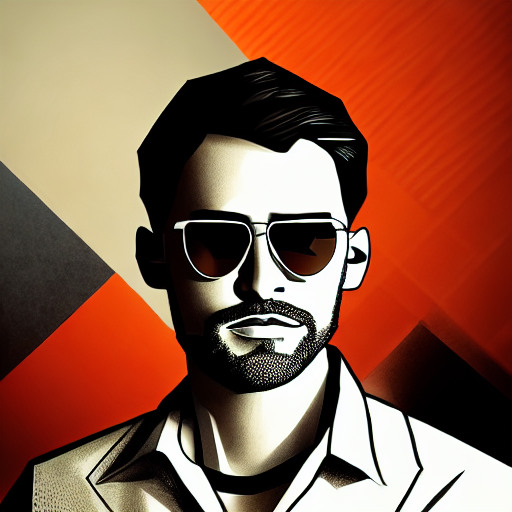

In [27]:
prompt = "a man with sunglasses"

seed = 10

seed_everything(seed)

image = pipe(
    prompt, 
    num_inference_steps=30, 
    guidance_scale=7.5
).images[0]

image